In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

#import missingno as msno
#import pandas_profiling

#import hdbscan
from sklearn.datasets import make_blobs
import time
import seaborn as sns

In [3]:
df = pd.read_csv("energydata_complete.csv")

In [4]:
df.rename(index=str, columns={"T1": "Kitchen Temp", "T2": "Living Room Temp", "T3": "Laundry Room", "T4": "Office Room", "T5": "Bathroom", "T6": "Outside building","T7": "Ironing Room", "T8": "Teenager Room", "T9": "Parents Room", "T_out": "Temp out"})

date  Appliances  lights  Kitchen Temp       RH_1  \
0      1/11/2016 17:00          60      30     19.890000  47.596667   
1      1/11/2016 17:10          60      30     19.890000  46.693333   
2      1/11/2016 17:20          50      30     19.890000  46.300000   
3      1/11/2016 17:30          50      40     19.890000  46.066667   
4      1/11/2016 17:40          60      40     19.890000  46.333333   
5      1/11/2016 17:50          50      40     19.890000  46.026667   
6      1/11/2016 18:00          60      50     19.890000  45.766667   
7      1/11/2016 18:10          60      50     19.856667  45.560000   
8      1/11/2016 18:20          60      40     19.790000  45.597500   
9      1/11/2016 18:30          70      40     19.856667  46.090000   
10     1/11/2016 18:40         230      70     19.926667  45.863333   
11     1/11/2016 18:50         580      60     20.066667  46.396667   
12     1/11/2016 19:00         430      50     20.133333  48.000000   
13     1/11/2016 19:10         250      40     20.260000  52.726667   
14     1/11/2016 19:20         100      10     20.426667  55.893333   
15     1/11/2016 19:30         100      10     20.566667  53.893333   
16     1/11/2016 19:40          90      10     20.730000  52.660000   
17     1/11/2016 19:50          70      30     20.856667  53.660000   
18     1/11/2016 20:00          80      30     20.890000  51.193333   
19     1/11/2016 20:10         140      40     20.890000  49.800000   
20     1/11/2016 20:20         120      20     20.890000  48.433333   
21     1/11/2016 20:30         190      40     20.963333  47.633333   
22     1/11/2016 20:40         110      40     21.033333  47.063333   
23     1/11/2016 20:50         110      40     21.100000  46.596667   
24     1/11/2016 21:00         110      30     21.133333  46.060000   
25     1/11/2016 21:10         110      20     21.200000  45.800000   
26     1/11/2016 21:20         100      30     21.290000  45.900000   
27     1/11/2016 21:30         100      20     21.356667  45.826667   
28     1/11/2016 21:40         100      20     21.390000  45.690000   
29     1/11/2016 21:50         100      20     21.500000  45.333333   
...                ...         ...     ...           ...        ...   
19705  5/27/2016 13:10         280       0     25.033333  48.363333   
19706  5/27/2016 13:20         240       0     25.166667  48.156667   
19707  5/27/2016 13:30         250       0     25.323333  47.930000   
19708  5/27/2016 13:40         220       0     25.390000  47.656667   
19709  5/27/2016 13:50         230       0     25.500000  47.133333   
19710  5/27/2016 14:00         190      10     25.500000  47.060000   
19711  5/27/2016 14:10         160       0     25.600000  46.990000   
19712  5/27/2016 14:20          80       0     25.600000  46.730000   
19713  5/27/2016 14:30          60       0     25.566667  46.633333   
19714  5/27/2016 14:40          60       0     25.500000  46.360000   
19715  5/27/2016 14:50          60       0     25.500000  46.060000   
19716  5/27/2016 15:00          60       0     25.500000  45.933333   
19717  5/27/2016 15:10          70       0     25.500000  45.760000   
19718  5/27/2016 15:20          80       0     25.500000  45.626667   
19719  5/27/2016 15:30          80       0     25.500000  45.590000   
19720  5/27/2016 15:40          70       0     25.500000  45.522500   
19721  5/27/2016 15:50         100       0     25.500000  45.633333   
19722  5/27/2016 16:00         100       0     25.500000  45.730000   
19723  5/27/2016 16:10          90       0     25.500000  45.790000   
19724  5/27/2016 16:20         100       0     25.500000  45.933333   
19725  5/27/2016 16:30         220       0     25.426667  46.060000   
19726  5/27/2016 16:40         180       0     25.500000  46.530000   
19727  5/27/2016 16:50         120       0     25.500000  47.456667   
19728  5/27/2016 17:00         110       0     25.600000  47.193333   
19729  5/27/2016 17:10          90       0

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

           ...                 T9          RH_9         T_out   Press_mm_hg  \
count      ...       19735.000000  19735.000000  19735.000000  19735.000000   
mean       ...          19.485828     41.552401      7.412580    755.522602   
std        ...           2.014712      4.151497      5.318464      7.399441   
min        ...          14.890000     29.166667     -5.000000    729.300000   
25%        ...          18.000000     38.500000      3.670000    750.933333   
50%        ...          19.390000     40.900000      6.920000    756.100000   
75%        ...          20.600000     44.338095     10.400000    760.933333   
max        ...          24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [7]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [8]:
import pandas_profiling

In [9]:
pandas_profiling.ProfileReport(df)

In [10]:
import datetime

In [11]:
df['date'] = pd.to_datetime(df.date)

In [139]:
df['T1'] = df['T1'].astype('int64')

In [140]:
df['T2'] = df['T2'].astype('int64')

In [141]:
df['T3'] = df['T3'].astype('int64')

In [143]:
df['T4'] = df['T4'].astype('int64')

In [144]:
df['T5'] = df['T5'].astype('int64')

In [145]:
df['T6'] = df['T6'].astype('int64')

In [146]:
df['T7'] = df['T7'].astype('int64')

In [147]:
df['T8'] = df['T8'].astype('int64')

In [148]:
df['T9'] = df['T9'].astype('int64')

In [149]:
df['T_out'] = df['T_out'].astype('int64')

In [154]:
df['Press_mm_hg'] = df['Press_mm_hg'].astype('int64')

In [155]:
df['RH_out'] = df['RH_out'].astype('int64')

In [156]:
df['Windspeed'] = df['Windspeed'].astype('int64')

In [170]:
df['Tdewpoint'] = df['Tdewpoint'].astype('int64')
df['Visibility'] = df['Visibility'].astype('int64')

In [158]:
df['rv1'] = df['rv1'].astype('int64')

In [159]:
df['rv2'] = df['rv2'].astype('int64')

In [160]:
df['RH_1'] = df['RH_1'].astype('int64')

In [161]:
df['RH_2'] = df['RH_2'].astype('int64')

In [162]:
df['RH_3'] = df['RH_3'].astype('int64')

In [163]:
df['RH_4'] = df['RH_4'].astype('int64')

In [164]:
df['RH_5'] = df['RH_5'].astype('int64')

In [165]:
df['RH_6'] = df['RH_6'].astype('int64')

In [166]:
df['RH_7'] = df['RH_7'].astype('int64')

In [167]:
df['RH_8'] = df['RH_8'].astype('int64')

In [168]:
df['RH_9'] = df['RH_9'].astype('int64')
df['RH_out'] = df['RH_out'].astype('int64')

In [39]:
df['weekday'] = df['date'].dt.strftime('%w').astype('int64')

In [31]:
df['Month'] = df['date'].dt.strftime('%m').astype('int64')

In [13]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [32]:
df['Week_no'] = df['date'].dt.strftime('%W').astype('int64')

In [34]:
df['Hour_of_the_day'] = df['date'].dt.strftime('%H').astype('int64')

In [14]:
df['date'] = pd.to_datetime(df.date)
df['TimeInSeconds'] = df['date'].dt.strftime('%s')

In [15]:
df['TimeInSeconds'] = df['date'].astype('int64')

In [33]:
df['DayStatus'] = (df['date'].dt.strftime('%w').astype(int) < 5).astype('int64')

In [40]:
df.head(50)

date  Appliances  lights         T1       RH_1         T2  \
0  2016-01-11 17:00:00          60      30  19.890000  47.596667  19.200000   
1  2016-01-11 17:10:00          60      30  19.890000  46.693333  19.200000   
2  2016-01-11 17:20:00          50      30  19.890000  46.300000  19.200000   
3  2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
4  2016-01-11 17:40:00          60      40  19.890000  46.333333  19.200000   
5  2016-01-11 17:50:00          50      40  19.890000  46.026667  19.200000   
6  2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
7  2016-01-11 18:10:00          60      50  19.856667  45.560000  19.200000   
8  2016-01-11 18:20:00          60      40  19.790000  45.597500  19.200000   
9  2016-01-11 18:30:00          70      40  19.856667  46.090000  19.230000   
10 2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
11 2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
12 2016-01-11 19:00:00         430      50  20.133333  48.000000  19.566667   
13 2016-01-11 19:10:00         250      40  20.260000  52.726667  19.730000   
14 2016-01-11 19:20:00         100      10  20.426667  55.893333  19.856667   
15 2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   
16 2016-01-11 19:40:00          90      10  20.730000  52.660000  20.166667   
17 2016-01-11 19:50:00          70      30  20.856667  53.660000  20.200000   
18 2016-01-11 20:00:00          80      30  20.890000  51.193333  20.200000   
19 2016-01-11 20:10:00         140      40  20.890000  49.800000  20.200000   
20 2016-01-11 20:20:00         120      20  20.890000  48.433333  20.200000   
21 2016-01-11 20:30:00         190      40  20.963333  47.633333  20.260000   
22 2016-01-11 20:40:00         110      40  21.033333  47.063333  20.290000   
23 2016-01-11 20:50:00         110      40  21.100000  46.596667  20.356667   
24 2016-01-11 21:00:00         110      30  21.133333  46.060000  20.426667   
25 2016-01-11 21:10:00         110      20  21.200000  45.800000  20.500000   
26 2016-01-11 21:20:00         100      30  21.290000  45.900000  20.533333   
27 2016-01-11 21:30:00         100      20  21.356667  45.826667  20.666667   
28 2016-01-11 21:40:00         100      20  21.390000  45.690000  20.700000   
29 2016-01-11 21:50:00         100      20  21.500000  45.333333  20.700000   
30 2016-01-11 22:00:00         110      20  21.500000  45.126667  20.790000   
31 2016-01-11 22:10:00         400      20  21.533333  44.966667  20.790000   
32 2016-01-11 22:20:00         400      20  21.600000  44.766667  20.890000   
33 2016-01-11 22:30:00         390      30  21.600000  44.560000  20.963333   
34 2016-01-11 22:40:00         240      20  21.600000  44.360000  21.000000   
35 2016-01-11 22:50:00          60      20  21.600000  44.200000  21.000000   
36 2016-01-11 23:00:00          60      20  21.600000  44.200000  21.000000   
37 2016-01-11 23:10:00          60      20  21.600000  44.200000  21.000000   
38 2016-01-11 23:20:00          50      10  21.600000  44.200000  21.000000   
39 2016-01-11 23:30:00          70      20  21.500000  44.230000  20.926667   
40 2016-01-11 23:40:00          60      20  21.500000  44.363333  20.890000   
41 2016-01-11 23:50:00          40      20  21.390000  44.433333  20.790000   
42 2016-01-12 00:00:00          40      10  21.390000  44.560000  20.790000   
43 2016-01-12 00:10:00          30      20  21.290000  44.826667  20.700000   
44 2016-01-12 00:20:00          40      20  21.290000  44.966667  20.633333   
45 2016-01-12 00:30:00          50      20  21.260000  45.090000  20.600000   
46 2016-01-12 00:40:00         310      10  21.200000  45.090000  20.600000   
47 2016-01-12 00:50:00         380      20  21.166667  45.230000  20.500000   
48 2016-01-12 01:00:00         380      20  21.075000  45.372500  20.500000   
49 2016-01-12 01:10:00         370      20  21.000000  45.400000  20

In [21]:
import matplotlib.pyplot as plt

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(df.date[1:42],df.Appliances[1:42])
ax.set_xlabel('Time(1 day)')
ax.set_ylabel('Appliances Wh')

Text(0,0.5,'Appliances Wh')

Text(0,0.5,'Appliances Wh')

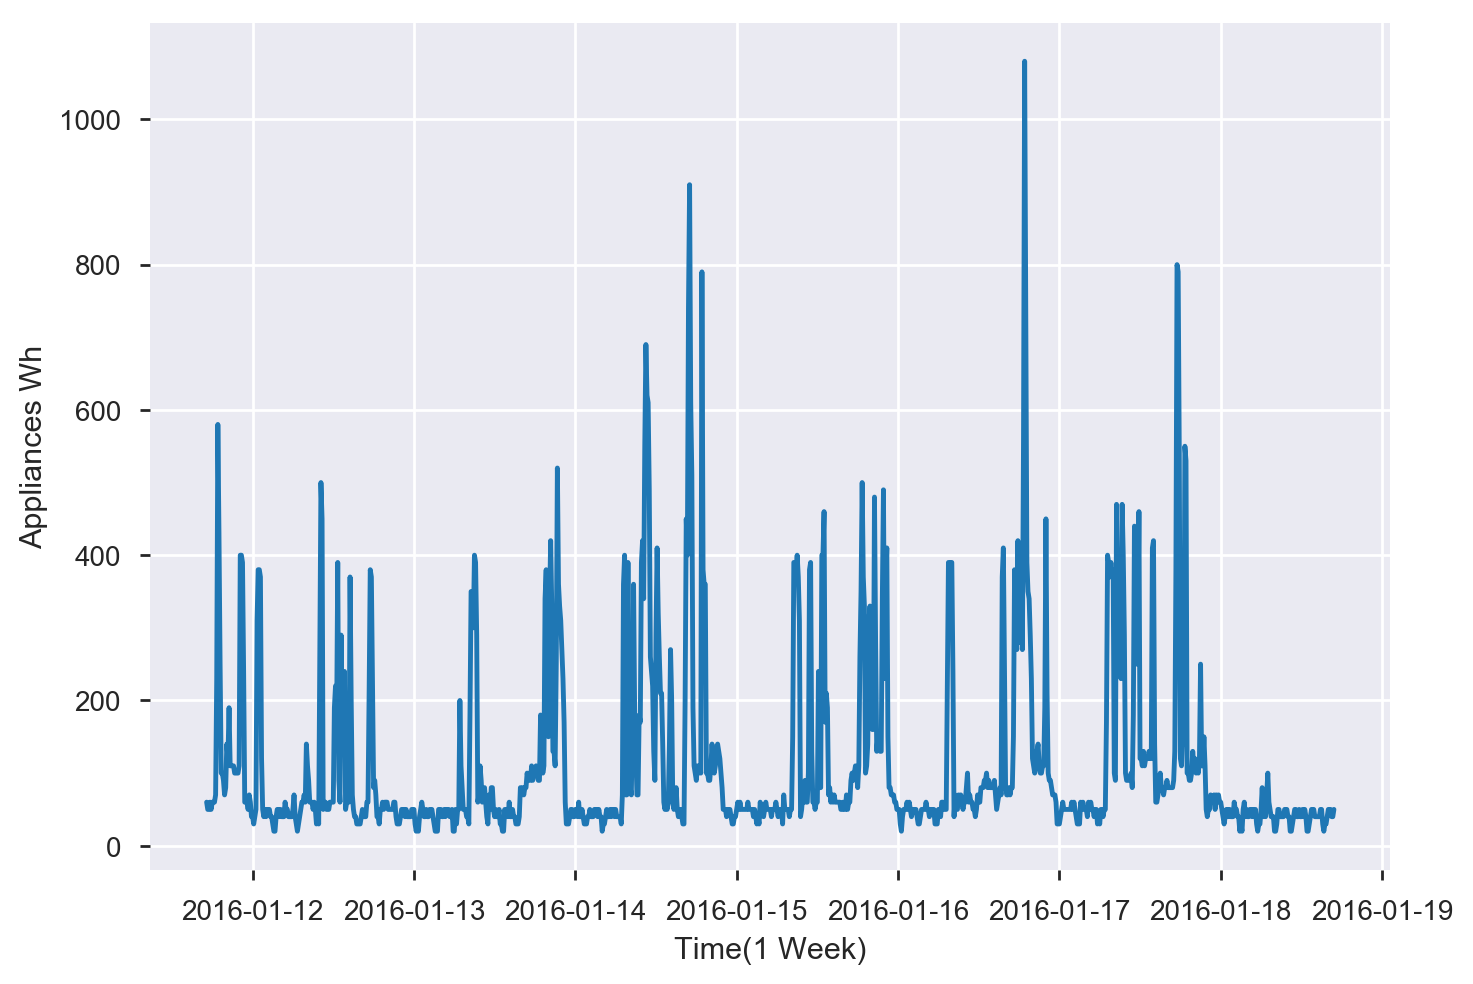

In [23]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(df.date[1:1008],df.Appliances[1:1008])
ax.set_xlabel('Time(1 Week)')
ax.set_ylabel('Appliances Wh')

In [24]:
plt.figure(figsize=(10,10))
df['Appliances'].hist(bins=50)
plt.xlabel("Appliances Wh")
plt.title("Frequency of Appliances")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

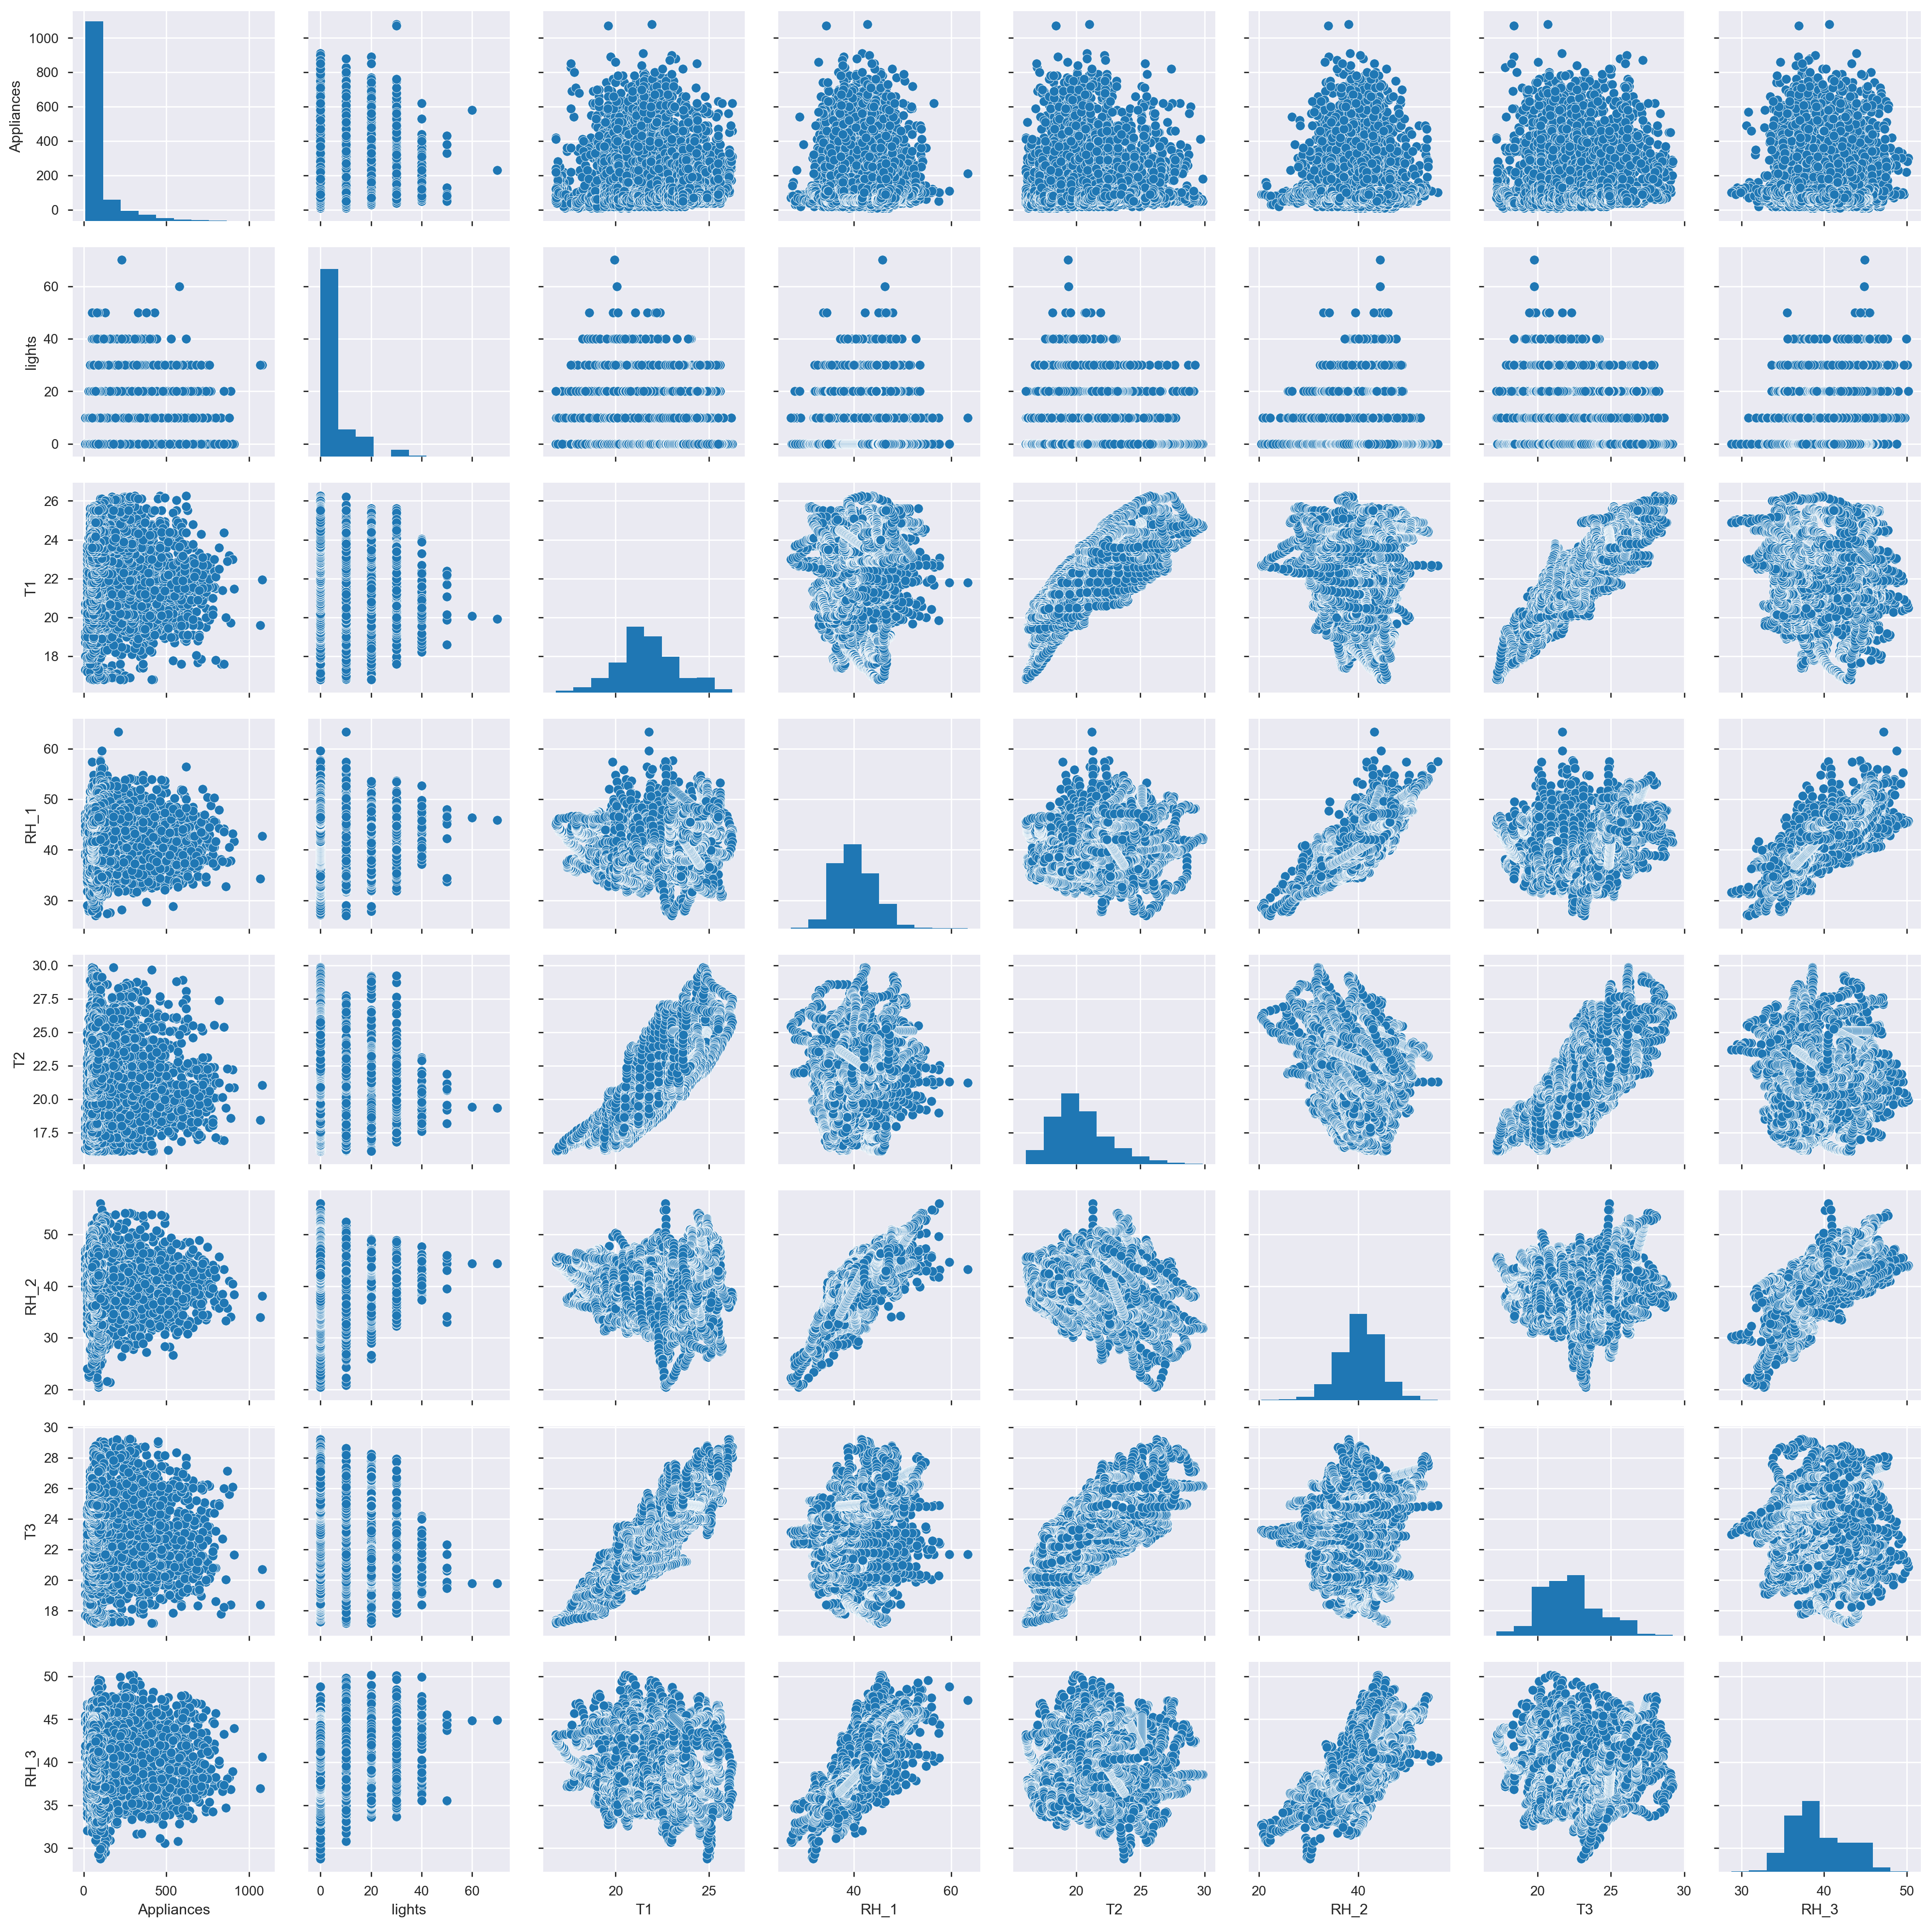

In [27]:
 g = sns.pairplot(df, vars=["Appliances", "lights", "T1", "RH_1", "T2", "RH_2", "T3", "RH_3"])

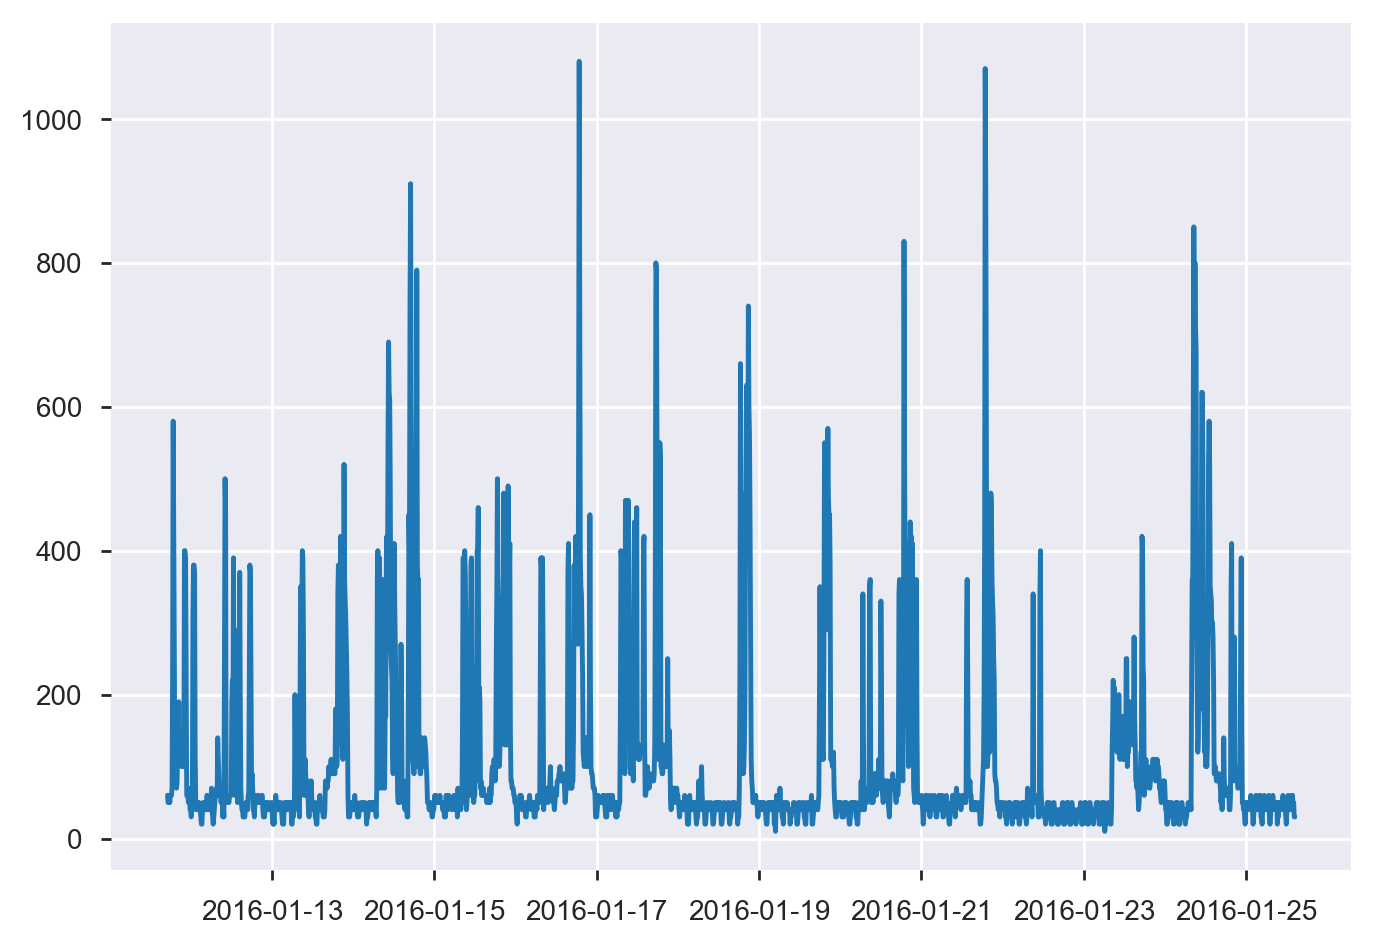

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(df.date[1:2001],df.Appliances[1:2001])

In [37]:
fig, ax = plt.subplots(figsize=(8,5));
sns.heatmap(corr, ax=ax);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation matrix heatmap');

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 35 columns):
date               19735 non-null datetime64[ns]
Appliances         19735 non-null int64
lights             19735 non-null int64
T1                 19735 non-null int64
RH_1               19735 non-null int64
T2                 19735 non-null int64
RH_2               19735 non-null int64
T3                 19735 non-null int64
RH_3               19735 non-null int64
T4                 19735 non-null int64
RH_4               19735 non-null int64
T5                 19735 non-null int64
RH_5               19735 non-null int64
T6                 19735 non-null int64
RH_6               19735 non-null int64
T7                 19735 non-null int64
RH_7               19735 non-null int64
T8                 19735 non-null int64
RH_8               19735 non-null int64
T9                 19735 non-null int64
RH_9               19735 non-null int64
T_out              19735 non-null int64
Pr

In [43]:
df.shape

(19735, 35)

In [188]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Appliances','date'],axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [189]:
y_train_s = np.arange(14801).reshape(14801,1) 
y_train_s.shape

(14801, 1)

In [190]:
X_train_s = X_train.values
y_train_s = y_train.values

In [191]:
y_train_s = y_train_s.ravel()

In [126]:
y_train_s = np.arange(14801).reshape(14801,1) 

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
    # create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)
    # summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(rfe.n_features_)
    #Check the accuracy of the model
rfe.score(X_train, y_train)

[False False  True False  True False  True False False False  True False
  True False False False  True False  True False  True  True False False
 False False False False  True False False False False]
[21  9  1 12  1  7  1 10  2 13  1 17  1 11  4  8  1 14  1 18  1  1 20  3 19
  6  5 23  1 24 22 15 16]
10


0.22072832916694818

In [210]:
feature_columns = ['RH_1','RH_2','RH_3','RH_5','RH_6','RH_8',
                   'RH_9','Press_mm_hg','RH_out',
                   'TimeInSeconds']  
#3 5 7 11 13 17 19 21 22 29 rh1 rh2 rh3 rh5  rh6 rh8 rh9 press rhout timsec

In [211]:
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[feature_columns])
X_test_scale=scale(X_test[feature_columns])

In [214]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [215]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log.predict(X_test_scale))

0.24077827320632347